In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data_customers = pd.read_excel('./customers.xlsx',  engine='openpyxl')
data_purchases = pd.read_excel('./purchases.xlsx',  engine='openpyxl')
data_products = pd.read_excel('./products.xlsx',  engine='openpyxl') 

In [8]:
data_customers.isna().sum()
data_customers.drop(columns=['Unnamed: 0'], inplace=True)
data_customers.isna().sum()

id               0
first_name       0
last_name        0
email            0
gender           0
street_num       0
street_name      0
street_suffix    0
city             0
state            0
postcode         0
full_name        0
dtype: int64

In [10]:
#data_products.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
data_products.isna().sum()

Unnamed: 0    0
id            0
product       0
cost          0
company       0
dtype: int64

In [11]:
data_purchases.drop(columns=['Unnamed: 0'], inplace=True)
data_purchases.isna().sum()

id              0
purch_date      0
customer_num    0
product_num     0
amount          0
paid            0
dtype: int64

In [12]:
data_customers['id'] = data_customers['id'].astype(object)
data_customers['postal'] = data_customers['postcode'].astype(object)
data_customers['street_num'] = data_customers['street_num'].astype(object)

data_products['id'] = data_products['id'].astype(object)

data_purchases['id'] = data_purchases['id'].astype(object)


data_products.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
data_products

,id,product,cost,company
0,1,Liners - Baking Cups,6.36,Skipfire
1,2,Nori Sea Weed - Gold Label,85.74,Dynazzy
2,3,Bar Bran Honey Nut,65.40,Ntag
3,4,Soup - Campbells Beef Stew,68.16,Photojam
4,5,Wine - Shiraz Wolf Blass Premium,87.39,Eare
5,6,"Wine - White, Riesling, Semi - Dry",99.22,Livepath
6,7,Brandy - Bar,13.83,Oloo
7,8,Onions - White,42.19,Oozz
8,9,Lettuce - Baby Salad Greens,30.01,Meevee
9,10,Sambuca - Ramazzotti,88.99,Livepath


In [22]:
a = data_products.groupby('company').agg({'cost':'mean'})
a

,cost
company,
Aibox,56.330
Babbleopia,63.980
Brainsphere,22.830
Browsezoom,41.050
Cogibox,51.135
Digitube,8.550
Dynabox,99.400
Dynazzy,85.740
Eare,87.390


In [23]:
avg_cost_per_company = data_products.groupby('company')['cost'].mean().reset_index()
avg_cost_per_company

,company,cost
0,Aibox,56.330
1,Babbleopia,63.980
2,Brainsphere,22.830
3,Browsezoom,41.050
4,Cogibox,51.135
5,Digitube,8.550
6,Dynabox,99.400
7,Dynazzy,85.740
8,Eare,87.390
9,Eazzy,74.280


Create a Bar plot where in x-axis we have company and in y-axis we have average cost per company.

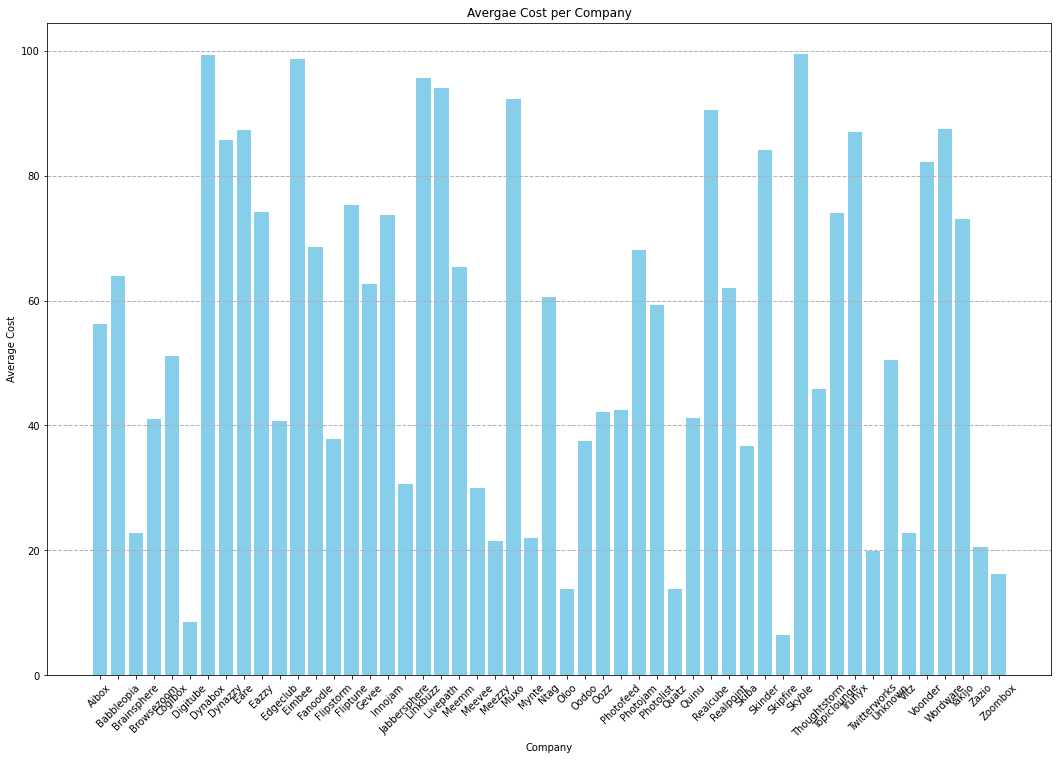

In [38]:
plt.figure(figsize=(18,12))
plt.bar(avg_cost_per_company['company'], avg_cost_per_company['cost'], color='skyblue')
plt.title('Avergae Cost per Company')
plt.xlabel('Company')
plt.ylabel('Average Cost')
plt.grid(axis='y', linestyle='--', linewidth=1)
plt.xticks(rotation=45)
plt.savefig('avg_cost_per_company.png')
plt.show()

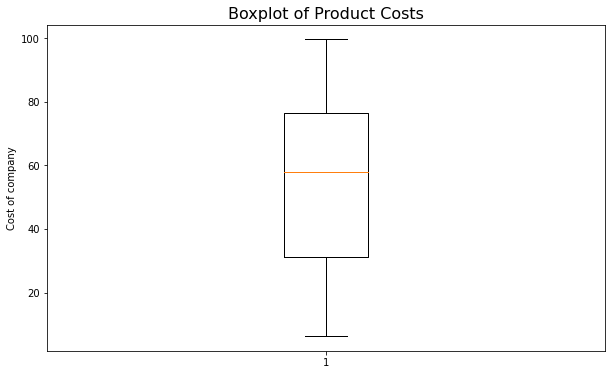

In [39]:
plt.figure(figsize=(10,6))
plt.boxplot(data_products['cost'])
plt.title('Boxplot of Product Costs',fontsize=16)
plt.ylabel('Cost of company')
plt.savefig('boxplot_cost_product.png')
plt.show()

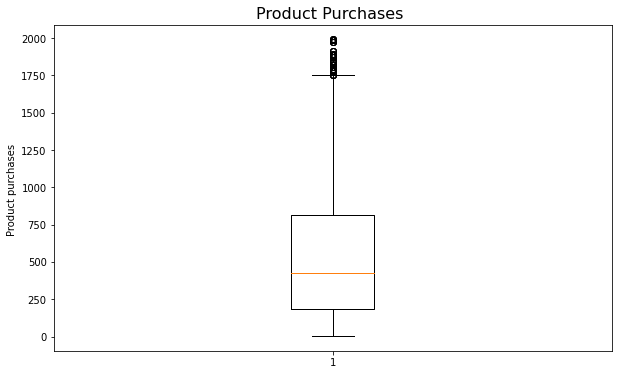

In [41]:
plt.figure(figsize=(10, 6))
plt.boxplot(data_purchases['paid'])
plt.title('Product Purchases ', fontsize=16)
plt.ylabel('Product purchases ')
plt.savefig('Product_Purchases.png')
plt.show()


Gender Distributuion : Pie Chart

In [46]:
gender_counts = data_customers['gender'].value_counts()
gender_counts



Male      528
Female    472
Name: gender, dtype: int64

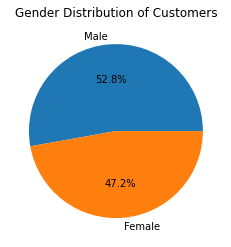

In [54]:
plt.figure(figsize=(4,4))
plt.pie(gender_counts, autopct='%1.1f%%',  labels=gender_counts.index)
plt.title('Gender Distribution of Customers')
plt.savefig('Gender_Distribution.png')
plt.show()

In [74]:
data_purchases['purch_month'] = data_purchases['purch_date'].dt.month
monthly_purchases = data_purchases.groupby('purch_month')['paid'].sum().reset_index()
monthly_purchases



,purch_month,paid
0,1,139986.42
1,2,83532.80
2,3,890751.05
3,4,715885.30
4,5,550416.29
5,6,271329.22
6,7,112608.31
7,8,118668.27
8,9,94420.38
9,10,92266.35


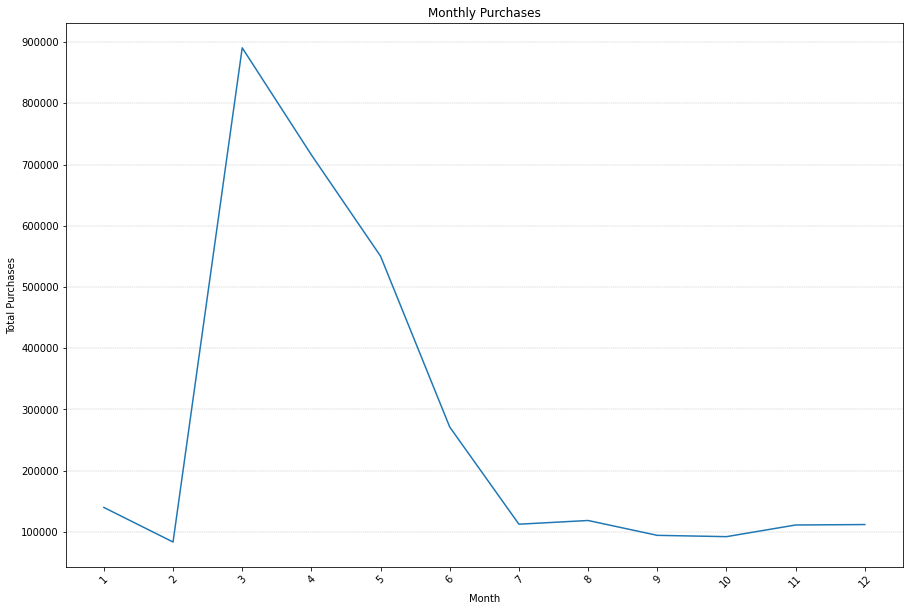

In [80]:
plt.figure(figsize=(15,10))
plt.plot(monthly_purchases['purch_month'], monthly_purchases['paid'], linestyle='solid')
plt.xlabel('Month')
plt.ylabel('Total Purchases')
plt.xticks(monthly_purchases['purch_month'], rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.4) 
plt.title('Monthly Purchases')
plt.savefig('Monthly_Purchases.png')
plt.show()

Seaborn : Simply built on top of Matplotlib

In [84]:
tips  = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Total tips per day

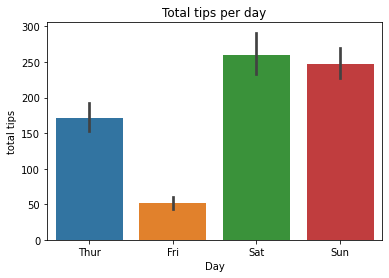

In [87]:
sns.barplot(x='day', y='tip', data=tips, estimator=sum)
plt.title('Total tips per day')
plt.xlabel('Day')
plt.ylabel('total tips')
plt.savefig('Total_tips_per_day.png')
plt.show()

KDE Plots : Visualize the probabilitty density function of any given variable

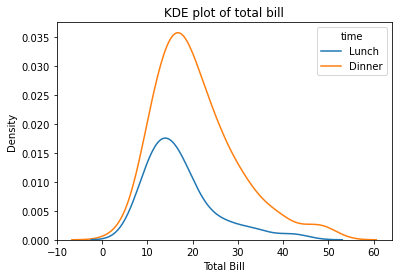

In [89]:
sns.kdeplot(data=tips, x='total_bill', hue='time')
plt.title('KDE plot of total bill')
plt.xlabel('Total Bill')
plt.show()

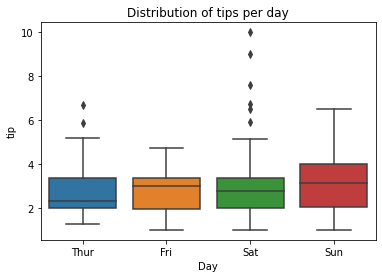

In [91]:
sns.boxplot(x='day', y='tip',data=tips)
plt.title('Distribution of tips per day')
plt.xlabel('Day')
plt.show()


Task 
Explore about Violin plot

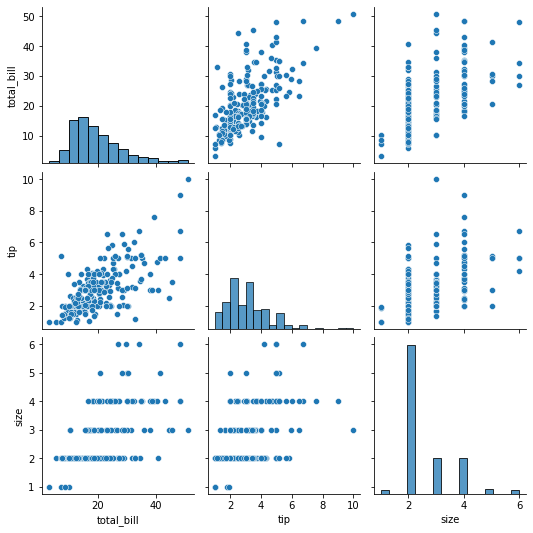

In [92]:
sns.pairplot(data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

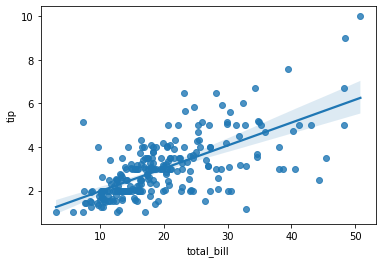

In [94]:
sns.regplot(x='total_bill', y='tip', data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

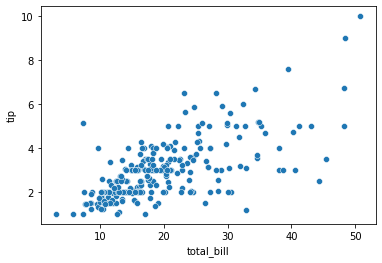

In [95]:
sns.scatterplot(x='total_bill', y='tip', data=tips)

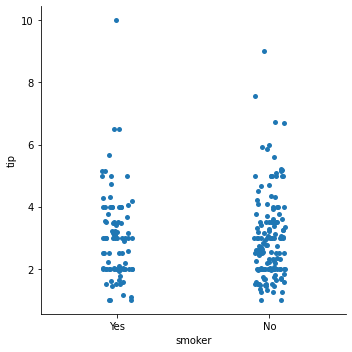

In [97]:
sns.catplot(x='smoker', y='tip', data=tips)

Correlation  Coefficient